In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter


# 2. Create a DataFrame for Seaborn
data_to_plot = pd.read_csv('six_qubits_plot_results_fid')

/var/folders/g4/_yhz0jm50s17zz2ms7wwytcr0000gr/T/ipykernel_24605/200794304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_to_plot, x='Policy', y='Infidelity', ax=ax, palette=['skyblue', 'lightgreen'], inner=None, cut=0)
/var/folders/g4/_yhz0jm50s17zz2ms7wwytcr0000gr/T/ipykernel_24605/200794304.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='Policy', y='Infidelity', ax=ax, width=0.1,


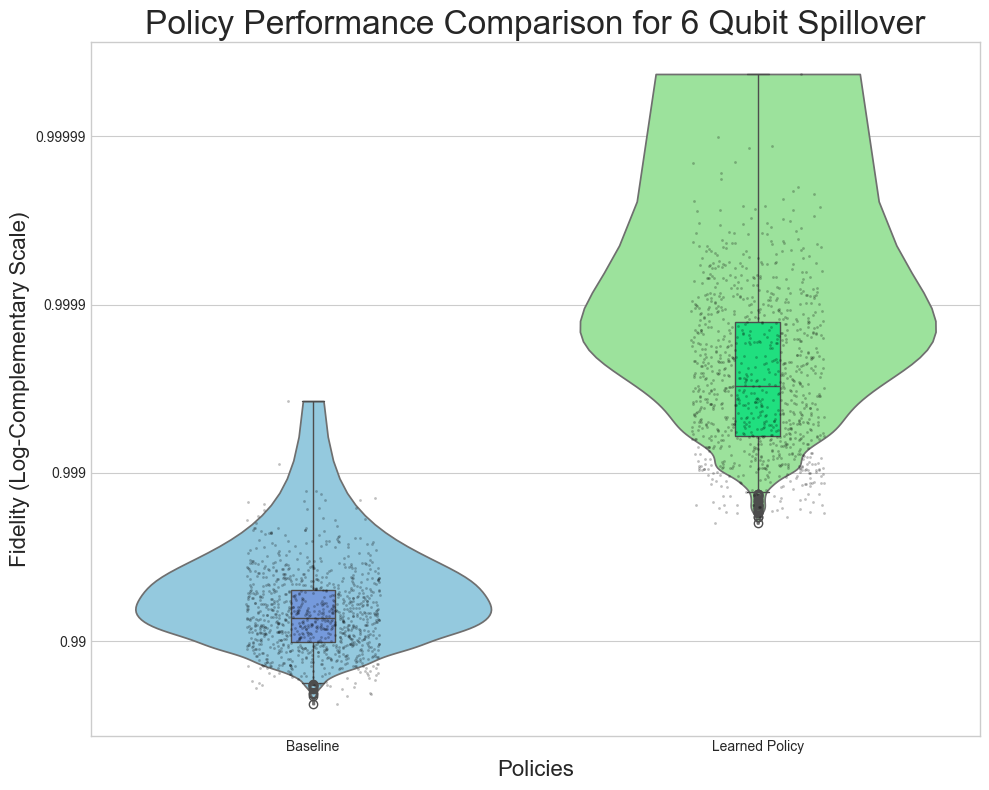

In [3]:
# 3. Create the Raincloud Plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot the main components on the 'Infidelity' data
sns.violinplot(data=data_to_plot, x='Policy', y='Infidelity', ax=ax, palette=['skyblue', 'lightgreen'], inner=None, cut=0)
sns.stripplot(data=data_to_plot, x='Policy', y='Infidelity', ax=ax, color='black', jitter=0.15, size=2.0, alpha=0.25)
sns.boxplot(data=data_to_plot, x='Policy', y='Infidelity', ax=ax, width=0.1, 
            boxprops={'zorder': 2}, palette=['cornflowerblue', 'springgreen'])


# 4. Set the Y-axis to a logarithmic scale
ax.set_yscale('log')

# 5. Invert the axis so high fidelity (low infidelity) is at the top
ax.invert_yaxis()

# 6. Apply custom formatting to the Y-axis labels
# This function takes the tick value (infidelity) and formats it as a fidelity
formatter = FuncFormatter(lambda y, _: f'{1-y:g}')
ax.yaxis.set_major_formatter(formatter)


# 7. Set final labels and title
ax.set_xlabel("Policies", fontsize=16)
ax.set_ylabel('Fidelity (Log-Complementary Scale)', fontsize=16)
ax.set_title('Policy Performance Comparison for 6 Qubit Spillover', fontsize=24)

plt.tight_layout()
plt.show()